##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4800512/26421880 [====>.........................] - ETA: 0s

 9207808/26421880 [=========>....................] - ETA: 0s

14827520/26421880 [===============>..............] - ETA: 0s

20447232/26421880 [======================>.......] - ETA: 0s

26066944/26421880 [============================>.] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 20:14 - loss: 0.1787

  46/1875 [..............................] - ETA: 2s - loss: 0.1362   

  92/1875 [>.............................] - ETA: 1s - loss: 0.1146

 138/1875 [=>............................] - ETA: 1s - loss: 0.1018

 184/1875 [=>............................] - ETA: 1s - loss: 0.0931

 229/1875 [==>...........................] - ETA: 1s - loss: 0.0867

 274/1875 [===>..........................] - ETA: 1s - loss: 0.0816

 320/1875 [====>.........................] - ETA: 1s - loss: 0.0774

 366/1875 [====>.........................] - ETA: 1s - loss: 0.0738

 413/1875 [=====>........................] - ETA: 1s - loss: 0.0707

 461/1875 [======>.......................] - ETA: 1s - loss: 0.0680

 507/1875 [=======>......................] - ETA: 1s - loss: 0.0656

 551/1875 [=======>......................] - ETA: 1s - loss: 0.0637

 598/1875 [========>.....................] - ETA: 1s - loss: 0.0618

 643/1875 [=========>....................] - ETA: 1s - loss: 0.0601

 690/1875 [==========>...................] - ETA: 1s - loss: 0.0585

 737/1875 [==========>...................] - ETA: 1s - loss: 0.0571

 783/1875 [===========>..................] - ETA: 1s - loss: 0.0558

 829/1875 [============>.................] - ETA: 1s - loss: 0.0546

 875/1875 [=============>................] - ETA: 1s - loss: 0.0535

 922/1875 [=============>................] - ETA: 1s - loss: 0.0524

 968/1875 [==============>...............] - ETA: 0s - loss: 0.0515

1013/1875 [===============>..............] - ETA: 0s - loss: 0.0506

1059/1875 [===============>..............] - ETA: 0s - loss: 0.0497

1104/1875 [================>.............] - ETA: 0s - loss: 0.0489

1150/1875 [=================>............] - ETA: 0s - loss: 0.0481

1197/1875 [==================>...........] - ETA: 0s - loss: 0.0474

1244/1875 [==================>...........] - ETA: 0s - loss: 0.0467

1290/1875 [===================>..........] - ETA: 0s - loss: 0.0460

1335/1875 [====================>.........] - ETA: 0s - loss: 0.0454

1381/1875 [=====================>........] - ETA: 0s - loss: 0.0448

1427/1875 [=====================>........] - ETA: 0s - loss: 0.0442

1473/1875 [======================>.......] - ETA: 0s - loss: 0.0436

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0431

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0426

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0421

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0416

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0411

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0407

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0403

1841/1875 [============================>.] - ETA: 0s - loss: 0.0399

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0396 - val_loss: 0.0130


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0129

  46/1875 [..............................] - ETA: 2s - loss: 0.0126

  92/1875 [>.............................] - ETA: 1s - loss: 0.0126

 137/1875 [=>............................] - ETA: 1s - loss: 0.0126

 177/1875 [=>............................] - ETA: 1s - loss: 0.0126

 217/1875 [==>...........................] - ETA: 1s - loss: 0.0125

 258/1875 [===>..........................] - ETA: 1s - loss: 0.0125

 302/1875 [===>..........................] - ETA: 1s - loss: 0.0125

 344/1875 [====>.........................] - ETA: 1s - loss: 0.0125

 389/1875 [=====>........................] - ETA: 1s - loss: 0.0125

 435/1875 [=====>........................] - ETA: 1s - loss: 0.0125

 478/1875 [======>.......................] - ETA: 1s - loss: 0.0125

 523/1875 [=======>......................] - ETA: 1s - loss: 0.0124

 569/1875 [========>.....................] - ETA: 1s - loss: 0.0124

 614/1875 [========>.....................] - ETA: 1s - loss: 0.0124

 659/1875 [=========>....................] - ETA: 1s - loss: 0.0124

 705/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 752/1875 [===========>..................] - ETA: 1s - loss: 0.0124

 798/1875 [===========>..................] - ETA: 1s - loss: 0.0123

 844/1875 [============>.................] - ETA: 1s - loss: 0.0123

 890/1875 [=============>................] - ETA: 1s - loss: 0.0123

 936/1875 [=============>................] - ETA: 1s - loss: 0.0123

 983/1875 [==============>...............] - ETA: 1s - loss: 0.0123

1028/1875 [===============>..............] - ETA: 0s - loss: 0.0123

1075/1875 [================>.............] - ETA: 0s - loss: 0.0122

1121/1875 [================>.............] - ETA: 0s - loss: 0.0122

1168/1875 [=================>............] - ETA: 0s - loss: 0.0122

1214/1875 [==================>...........] - ETA: 0s - loss: 0.0122

1261/1875 [===================>..........] - ETA: 0s - loss: 0.0122

1309/1875 [===================>..........] - ETA: 0s - loss: 0.0122

1356/1875 [====================>.........] - ETA: 0s - loss: 0.0121

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0121

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0121

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0121

1538/1875 [=======================>......] - ETA: 0s - loss: 0.0121

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0121

1630/1875 [=========================>....] - ETA: 0s - loss: 0.0120

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0120

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0120

1772/1875 [===========================>..] - ETA: 0s - loss: 0.0120

1818/1875 [============================>.] - ETA: 0s - loss: 0.0120

1864/1875 [============================>.] - ETA: 0s - loss: 0.0120

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0120 - val_loss: 0.0105


Epoch 3/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0083

  48/1875 [..............................] - ETA: 1s - loss: 0.0103

  94/1875 [>.............................] - ETA: 1s - loss: 0.0103

 142/1875 [=>............................] - ETA: 1s - loss: 0.0104

 188/1875 [==>...........................] - ETA: 1s - loss: 0.0104

 235/1875 [==>...........................] - ETA: 1s - loss: 0.0104

 280/1875 [===>..........................] - ETA: 1s - loss: 0.0104

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0104

 375/1875 [=====>........................] - ETA: 1s - loss: 0.0103

 422/1875 [=====>........................] - ETA: 1s - loss: 0.0103

 470/1875 [======>.......................] - ETA: 1s - loss: 0.0103

 517/1875 [=======>......................] - ETA: 1s - loss: 0.0103

 564/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 610/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 656/1875 [=========>....................] - ETA: 1s - loss: 0.0103

 703/1875 [==========>...................] - ETA: 1s - loss: 0.0103

 750/1875 [===========>..................] - ETA: 1s - loss: 0.0103

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0103

 843/1875 [============>.................] - ETA: 1s - loss: 0.0103

 889/1875 [=============>................] - ETA: 1s - loss: 0.0103

 936/1875 [=============>................] - ETA: 1s - loss: 0.0103

 982/1875 [==============>...............] - ETA: 0s - loss: 0.0103

1028/1875 [===============>..............] - ETA: 0s - loss: 0.0102

1073/1875 [================>.............] - ETA: 0s - loss: 0.0102

1121/1875 [================>.............] - ETA: 0s - loss: 0.0102

1167/1875 [=================>............] - ETA: 0s - loss: 0.0102

1213/1875 [==================>...........] - ETA: 0s - loss: 0.0102

1260/1875 [===================>..........] - ETA: 0s - loss: 0.0102

1306/1875 [===================>..........] - ETA: 0s - loss: 0.0102

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0102

1400/1875 [=====================>........] - ETA: 0s - loss: 0.0102

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0102

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0102

1539/1875 [=======================>......] - ETA: 0s - loss: 0.0102

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0102

1633/1875 [=========================>....] - ETA: 0s - loss: 0.0102

1681/1875 [=========================>....] - ETA: 0s - loss: 0.0102

1728/1875 [==========================>...] - ETA: 0s - loss: 0.0102

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0102

1822/1875 [============================>.] - ETA: 0s - loss: 0.0102

1868/1875 [============================>.] - ETA: 0s - loss: 0.0101

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0097


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0077

  48/1875 [..............................] - ETA: 1s - loss: 0.0099

  93/1875 [>.............................] - ETA: 1s - loss: 0.0098

 140/1875 [=>............................] - ETA: 1s - loss: 0.0097

 187/1875 [=>............................] - ETA: 1s - loss: 0.0096

 234/1875 [==>...........................] - ETA: 1s - loss: 0.0096

 281/1875 [===>..........................] - ETA: 1s - loss: 0.0096

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0096

 375/1875 [=====>........................] - ETA: 1s - loss: 0.0096

 422/1875 [=====>........................] - ETA: 1s - loss: 0.0095

 468/1875 [======>.......................] - ETA: 1s - loss: 0.0095

 515/1875 [=======>......................] - ETA: 1s - loss: 0.0095

 562/1875 [=======>......................] - ETA: 1s - loss: 0.0095

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0095

 657/1875 [=========>....................] - ETA: 1s - loss: 0.0095

 704/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 797/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 843/1875 [============>.................] - ETA: 1s - loss: 0.0095

 890/1875 [=============>................] - ETA: 1s - loss: 0.0095

 937/1875 [=============>................] - ETA: 1s - loss: 0.0095

 984/1875 [==============>...............] - ETA: 0s - loss: 0.0095

1032/1875 [===============>..............] - ETA: 0s - loss: 0.0095

1080/1875 [================>.............] - ETA: 0s - loss: 0.0095

1126/1875 [=================>............] - ETA: 0s - loss: 0.0095

1173/1875 [=================>............] - ETA: 0s - loss: 0.0095

1218/1875 [==================>...........] - ETA: 0s - loss: 0.0095

1263/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1309/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1355/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1400/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1447/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1491/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1719/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1765/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1856/1875 [============================>.] - ETA: 0s - loss: 0.0095

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0095 - val_loss: 0.0093


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0092

  46/1875 [..............................] - ETA: 2s - loss: 0.0093

  91/1875 [>.............................] - ETA: 1s - loss: 0.0093

 138/1875 [=>............................] - ETA: 1s - loss: 0.0092

 184/1875 [=>............................] - ETA: 1s - loss: 0.0092

 231/1875 [==>...........................] - ETA: 1s - loss: 0.0092

 279/1875 [===>..........................] - ETA: 1s - loss: 0.0092

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0092

 375/1875 [=====>........................] - ETA: 1s - loss: 0.0092

 421/1875 [=====>........................] - ETA: 1s - loss: 0.0092

 467/1875 [======>.......................] - ETA: 1s - loss: 0.0092

 514/1875 [=======>......................] - ETA: 1s - loss: 0.0092

 560/1875 [=======>......................] - ETA: 1s - loss: 0.0092

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0092

 650/1875 [=========>....................] - ETA: 1s - loss: 0.0092

 694/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 740/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 787/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 833/1875 [============>.................] - ETA: 1s - loss: 0.0092

 877/1875 [=============>................] - ETA: 1s - loss: 0.0092

 923/1875 [=============>................] - ETA: 1s - loss: 0.0092

 969/1875 [==============>...............] - ETA: 0s - loss: 0.0092

1014/1875 [===============>..............] - ETA: 0s - loss: 0.0092

1060/1875 [===============>..............] - ETA: 0s - loss: 0.0092

1105/1875 [================>.............] - ETA: 0s - loss: 0.0092

1151/1875 [=================>............] - ETA: 0s - loss: 0.0092

1199/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1247/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1292/1875 [===================>..........] - ETA: 0s - loss: 0.0092

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1382/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1475/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1660/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1844/1875 [============================>.] - ETA: 0s - loss: 0.0092

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - val_loss: 0.0091


Epoch 6/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0119

  46/1875 [..............................] - ETA: 2s - loss: 0.0096

  91/1875 [>.............................] - ETA: 1s - loss: 0.0093

 137/1875 [=>............................] - ETA: 1s - loss: 0.0092

 184/1875 [=>............................] - ETA: 1s - loss: 0.0092

 230/1875 [==>...........................] - ETA: 1s - loss: 0.0091

 276/1875 [===>..........................] - ETA: 1s - loss: 0.0091

 319/1875 [====>.........................] - ETA: 1s - loss: 0.0091

 363/1875 [====>.........................] - ETA: 1s - loss: 0.0091

 409/1875 [=====>........................] - ETA: 1s - loss: 0.0091

 455/1875 [======>.......................] - ETA: 1s - loss: 0.0091

 499/1875 [======>.......................] - ETA: 1s - loss: 0.0091

 544/1875 [=======>......................] - ETA: 1s - loss: 0.0090

 590/1875 [========>.....................] - ETA: 1s - loss: 0.0090

 634/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 680/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 726/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 771/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 817/1875 [============>.................] - ETA: 1s - loss: 0.0090

 861/1875 [============>.................] - ETA: 1s - loss: 0.0090

 906/1875 [=============>................] - ETA: 1s - loss: 0.0090

 953/1875 [==============>...............] - ETA: 1s - loss: 0.0090

1001/1875 [===============>..............] - ETA: 0s - loss: 0.0090

1048/1875 [===============>..............] - ETA: 0s - loss: 0.0090

1093/1875 [================>.............] - ETA: 0s - loss: 0.0090

1139/1875 [=================>............] - ETA: 0s - loss: 0.0090

1185/1875 [=================>............] - ETA: 0s - loss: 0.0090

1232/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1278/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1324/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1371/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1417/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1510/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1604/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1698/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1837/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0089

  46/1875 [..............................] - ETA: 2s - loss: 0.0085

  91/1875 [>.............................] - ETA: 2s - loss: 0.0086

 137/1875 [=>............................] - ETA: 1s - loss: 0.0087

 181/1875 [=>............................] - ETA: 1s - loss: 0.0087

 227/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 271/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 315/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 362/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 409/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 454/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 498/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 544/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 592/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 640/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 687/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 733/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 827/1875 [============>.................] - ETA: 1s - loss: 0.0088

 874/1875 [============>.................] - ETA: 1s - loss: 0.0088

 920/1875 [=============>................] - ETA: 1s - loss: 0.0088

 967/1875 [==============>...............] - ETA: 0s - loss: 0.0088

1014/1875 [===============>..............] - ETA: 0s - loss: 0.0089

1061/1875 [===============>..............] - ETA: 0s - loss: 0.0089

1107/1875 [================>.............] - ETA: 0s - loss: 0.0089

1153/1875 [=================>............] - ETA: 0s - loss: 0.0089

1198/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1245/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1291/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1338/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1383/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1427/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1474/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1846/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0089


Epoch 8/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0086

  48/1875 [..............................] - ETA: 1s - loss: 0.0091

  94/1875 [>.............................] - ETA: 1s - loss: 0.0089

 139/1875 [=>............................] - ETA: 1s - loss: 0.0088

 180/1875 [=>............................] - ETA: 1s - loss: 0.0088

 223/1875 [==>...........................] - ETA: 1s - loss: 0.0088

 266/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 308/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 352/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 395/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 441/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 488/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 533/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 580/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 626/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 762/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 808/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 854/1875 [============>.................] - ETA: 1s - loss: 0.0088

 901/1875 [=============>................] - ETA: 1s - loss: 0.0088

 948/1875 [==============>...............] - ETA: 1s - loss: 0.0088

 994/1875 [==============>...............] - ETA: 0s - loss: 0.0088

1040/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1087/1875 [================>.............] - ETA: 0s - loss: 0.0088

1134/1875 [=================>............] - ETA: 0s - loss: 0.0088

1181/1875 [=================>............] - ETA: 0s - loss: 0.0088

1227/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1273/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1366/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1414/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1460/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1506/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1597/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1735/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1780/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1827/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0092

  48/1875 [..............................] - ETA: 1s - loss: 0.0086

  93/1875 [>.............................] - ETA: 1s - loss: 0.0086

 138/1875 [=>............................] - ETA: 1s - loss: 0.0087

 183/1875 [=>............................] - ETA: 1s - loss: 0.0087

 229/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 274/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 319/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 367/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 414/1875 [=====>........................] - ETA: 1s - loss: 0.0087

 460/1875 [======>.......................] - ETA: 1s - loss: 0.0087

 507/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 554/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 601/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 648/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 693/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 741/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 788/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 836/1875 [============>.................] - ETA: 1s - loss: 0.0088

 884/1875 [=============>................] - ETA: 1s - loss: 0.0088

 931/1875 [=============>................] - ETA: 1s - loss: 0.0088

 979/1875 [==============>...............] - ETA: 0s - loss: 0.0088

1025/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1073/1875 [================>.............] - ETA: 0s - loss: 0.0088

1119/1875 [================>.............] - ETA: 0s - loss: 0.0088

1166/1875 [=================>............] - ETA: 0s - loss: 0.0088

1213/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1259/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1304/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1351/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1398/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1445/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1539/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1720/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1854/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0088


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0090

  47/1875 [..............................] - ETA: 2s - loss: 0.0088

  94/1875 [>.............................] - ETA: 1s - loss: 0.0088

 141/1875 [=>............................] - ETA: 1s - loss: 0.0087

 189/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 236/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 283/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 329/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 375/1875 [=====>........................] - ETA: 1s - loss: 0.0087

 422/1875 [=====>........................] - ETA: 1s - loss: 0.0087

 469/1875 [======>.......................] - ETA: 1s - loss: 0.0087

 517/1875 [=======>......................] - ETA: 1s - loss: 0.0087

 563/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 608/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0087

 697/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 744/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 789/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 834/1875 [============>.................] - ETA: 1s - loss: 0.0087

 881/1875 [=============>................] - ETA: 1s - loss: 0.0087

 927/1875 [=============>................] - ETA: 1s - loss: 0.0087

 973/1875 [==============>...............] - ETA: 0s - loss: 0.0087

1019/1875 [===============>..............] - ETA: 0s - loss: 0.0087

1065/1875 [================>.............] - ETA: 0s - loss: 0.0087

1111/1875 [================>.............] - ETA: 0s - loss: 0.0087

1157/1875 [=================>............] - ETA: 0s - loss: 0.0087

1198/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1240/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1284/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1331/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1425/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1565/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1703/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1840/1875 [============================>.] - ETA: 0s - loss: 0.0087

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

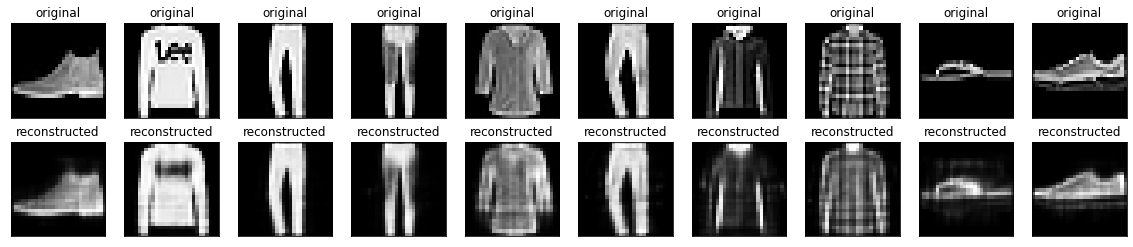

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


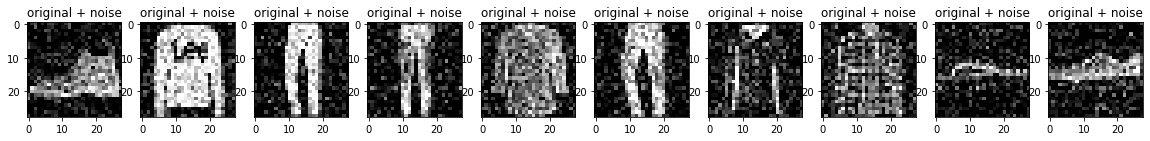

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 58:11 - loss: 0.1707

  23/1875 [..............................] - ETA: 4s - loss: 0.1684   

  46/1875 [..............................] - ETA: 4s - loss: 0.1626

  70/1875 [>.............................] - ETA: 4s - loss: 0.1533

  93/1875 [>.............................] - ETA: 3s - loss: 0.1442

 117/1875 [>.............................] - ETA: 3s - loss: 0.1355

 140/1875 [=>............................] - ETA: 3s - loss: 0.1282

 164/1875 [=>............................] - ETA: 3s - loss: 0.1214

 188/1875 [==>...........................] - ETA: 3s - loss: 0.1155

 212/1875 [==>...........................] - ETA: 3s - loss: 0.1101

 235/1875 [==>...........................] - ETA: 3s - loss: 0.1056

 258/1875 [===>..........................] - ETA: 3s - loss: 0.1014

 282/1875 [===>..........................] - ETA: 3s - loss: 0.0975

 305/1875 [===>..........................] - ETA: 3s - loss: 0.0941

 329/1875 [====>.........................] - ETA: 3s - loss: 0.0909

 353/1875 [====>.........................] - ETA: 3s - loss: 0.0879

 377/1875 [=====>........................] - ETA: 3s - loss: 0.0852

 401/1875 [=====>........................] - ETA: 3s - loss: 0.0827

 425/1875 [=====>........................] - ETA: 3s - loss: 0.0804

 449/1875 [======>.......................] - ETA: 3s - loss: 0.0782

 473/1875 [======>.......................] - ETA: 3s - loss: 0.0762

 496/1875 [======>.......................] - ETA: 2s - loss: 0.0745

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0727

 543/1875 [=======>......................] - ETA: 2s - loss: 0.0711

 565/1875 [========>.....................] - ETA: 2s - loss: 0.0697

 588/1875 [========>.....................] - ETA: 2s - loss: 0.0683

 612/1875 [========>.....................] - ETA: 2s - loss: 0.0669

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0656

 659/1875 [=========>....................] - ETA: 2s - loss: 0.0644

 683/1875 [=========>....................] - ETA: 2s - loss: 0.0632

 707/1875 [==========>...................] - ETA: 2s - loss: 0.0621

 731/1875 [==========>...................] - ETA: 2s - loss: 0.0610

 755/1875 [===========>..................] - ETA: 2s - loss: 0.0600

 777/1875 [===========>..................] - ETA: 2s - loss: 0.0591

 799/1875 [===========>..................] - ETA: 2s - loss: 0.0582

 822/1875 [============>.................] - ETA: 2s - loss: 0.0573

 846/1875 [============>.................] - ETA: 2s - loss: 0.0565

 870/1875 [============>.................] - ETA: 2s - loss: 0.0556

 893/1875 [=============>................] - ETA: 2s - loss: 0.0549

 916/1875 [=============>................] - ETA: 2s - loss: 0.0541

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0534

 962/1875 [==============>...............] - ETA: 1s - loss: 0.0527

 985/1875 [==============>...............] - ETA: 1s - loss: 0.0521

1008/1875 [===============>..............] - ETA: 1s - loss: 0.0514

1031/1875 [===============>..............] - ETA: 1s - loss: 0.0508

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0502

1078/1875 [================>.............] - ETA: 1s - loss: 0.0496

1102/1875 [================>.............] - ETA: 1s - loss: 0.0491

1126/1875 [=================>............] - ETA: 1s - loss: 0.0485

1150/1875 [=================>............] - ETA: 1s - loss: 0.0480

1173/1875 [=================>............] - ETA: 1s - loss: 0.0475

1196/1875 [==================>...........] - ETA: 1s - loss: 0.0470

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0465

1242/1875 [==================>...........] - ETA: 1s - loss: 0.0460

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0456

1289/1875 [===================>..........] - ETA: 1s - loss: 0.0451

1313/1875 [====================>.........] - ETA: 1s - loss: 0.0447

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0443

1361/1875 [====================>.........] - ETA: 1s - loss: 0.0438

1385/1875 [=====================>........] - ETA: 1s - loss: 0.0434

1408/1875 [=====================>........] - ETA: 1s - loss: 0.0430

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0427

1456/1875 [======================>.......] - ETA: 0s - loss: 0.0423

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0419

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0416

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0412

1549/1875 [=======================>......] - ETA: 0s - loss: 0.0409

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0406

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0403

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0400

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0396

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0394

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0391

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0388

1738/1875 [==========================>...] - ETA: 0s - loss: 0.0385

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0382

1784/1875 [===========================>..] - ETA: 0s - loss: 0.0380

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0377

1831/1875 [============================>.] - ETA: 0s - loss: 0.0375

1855/1875 [============================>.] - ETA: 0s - loss: 0.0372

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0370 - val_loss: 0.0093


Epoch 2/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0122

  24/1875 [..............................] - ETA: 4s - loss: 0.0098

  47/1875 [..............................] - ETA: 4s - loss: 0.0096

  70/1875 [>.............................] - ETA: 4s - loss: 0.0095

  94/1875 [>.............................] - ETA: 3s - loss: 0.0095

 117/1875 [>.............................] - ETA: 3s - loss: 0.0094

 140/1875 [=>............................] - ETA: 3s - loss: 0.0094

 163/1875 [=>............................] - ETA: 3s - loss: 0.0094

 186/1875 [=>............................] - ETA: 3s - loss: 0.0093

 209/1875 [==>...........................] - ETA: 3s - loss: 0.0093

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0093

 254/1875 [===>..........................] - ETA: 3s - loss: 0.0093

 277/1875 [===>..........................] - ETA: 3s - loss: 0.0093

 300/1875 [===>..........................] - ETA: 3s - loss: 0.0093

 323/1875 [====>.........................] - ETA: 3s - loss: 0.0093

 346/1875 [====>.........................] - ETA: 3s - loss: 0.0092

 369/1875 [====>.........................] - ETA: 3s - loss: 0.0092

 392/1875 [=====>........................] - ETA: 3s - loss: 0.0092

 415/1875 [=====>........................] - ETA: 3s - loss: 0.0092

 439/1875 [======>.......................] - ETA: 3s - loss: 0.0092

 461/1875 [======>.......................] - ETA: 3s - loss: 0.0092

 485/1875 [======>.......................] - ETA: 3s - loss: 0.0092

 509/1875 [=======>......................] - ETA: 3s - loss: 0.0092

 533/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 557/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0092

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0092

 628/1875 [=========>....................] - ETA: 2s - loss: 0.0092

 651/1875 [=========>....................] - ETA: 2s - loss: 0.0092

 675/1875 [=========>....................] - ETA: 2s - loss: 0.0092

 699/1875 [==========>...................] - ETA: 2s - loss: 0.0091

 723/1875 [==========>...................] - ETA: 2s - loss: 0.0091

 747/1875 [==========>...................] - ETA: 2s - loss: 0.0091

 771/1875 [===========>..................] - ETA: 2s - loss: 0.0091

 795/1875 [===========>..................] - ETA: 2s - loss: 0.0091

 819/1875 [============>.................] - ETA: 2s - loss: 0.0091

 843/1875 [============>.................] - ETA: 2s - loss: 0.0091

 867/1875 [============>.................] - ETA: 2s - loss: 0.0091

 891/1875 [=============>................] - ETA: 2s - loss: 0.0091

 915/1875 [=============>................] - ETA: 2s - loss: 0.0091

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0091

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0091

 987/1875 [==============>...............] - ETA: 1s - loss: 0.0091

1010/1875 [===============>..............] - ETA: 1s - loss: 0.0091

1034/1875 [===============>..............] - ETA: 1s - loss: 0.0091

1057/1875 [===============>..............] - ETA: 1s - loss: 0.0091

1081/1875 [================>.............] - ETA: 1s - loss: 0.0091

1104/1875 [================>.............] - ETA: 1s - loss: 0.0091

1126/1875 [=================>............] - ETA: 1s - loss: 0.0091

1149/1875 [=================>............] - ETA: 1s - loss: 0.0091

1173/1875 [=================>............] - ETA: 1s - loss: 0.0090

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1221/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1245/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1269/1875 [===================>..........] - ETA: 1s - loss: 0.0090

1292/1875 [===================>..........] - ETA: 1s - loss: 0.0090

1315/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1339/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1363/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1411/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1435/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1459/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1482/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1527/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1569/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1633/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1656/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1748/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1816/1875 [============================>.] - ETA: 0s - loss: 0.0089

1839/1875 [============================>.] - ETA: 0s - loss: 0.0089

1862/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0081


Epoch 3/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0087

  24/1875 [..............................] - ETA: 4s - loss: 0.0081

  48/1875 [..............................] - ETA: 3s - loss: 0.0080

  70/1875 [>.............................] - ETA: 3s - loss: 0.0080

  93/1875 [>.............................] - ETA: 3s - loss: 0.0080

 117/1875 [>.............................] - ETA: 3s - loss: 0.0080

 140/1875 [=>............................] - ETA: 3s - loss: 0.0080

 163/1875 [=>............................] - ETA: 3s - loss: 0.0080

 187/1875 [=>............................] - ETA: 3s - loss: 0.0080

 211/1875 [==>...........................] - ETA: 3s - loss: 0.0080

 233/1875 [==>...........................] - ETA: 3s - loss: 0.0080

 256/1875 [===>..........................] - ETA: 3s - loss: 0.0080

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0080

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0080

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0080

 352/1875 [====>.........................] - ETA: 3s - loss: 0.0080

 376/1875 [=====>........................] - ETA: 3s - loss: 0.0080

 400/1875 [=====>........................] - ETA: 3s - loss: 0.0080

 423/1875 [=====>........................] - ETA: 3s - loss: 0.0080

 446/1875 [======>.......................] - ETA: 3s - loss: 0.0080

 467/1875 [======>.......................] - ETA: 3s - loss: 0.0080

 489/1875 [======>.......................] - ETA: 3s - loss: 0.0080

 510/1875 [=======>......................] - ETA: 3s - loss: 0.0080

 532/1875 [=======>......................] - ETA: 2s - loss: 0.0080

 553/1875 [=======>......................] - ETA: 2s - loss: 0.0080

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0080

 596/1875 [========>.....................] - ETA: 2s - loss: 0.0080

 617/1875 [========>.....................] - ETA: 2s - loss: 0.0080

 639/1875 [=========>....................] - ETA: 2s - loss: 0.0080

 661/1875 [=========>....................] - ETA: 2s - loss: 0.0080

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0080

 708/1875 [==========>...................] - ETA: 2s - loss: 0.0080

 731/1875 [==========>...................] - ETA: 2s - loss: 0.0080

 754/1875 [===========>..................] - ETA: 2s - loss: 0.0080

 777/1875 [===========>..................] - ETA: 2s - loss: 0.0080

 801/1875 [===========>..................] - ETA: 2s - loss: 0.0080

 824/1875 [============>.................] - ETA: 2s - loss: 0.0080

 848/1875 [============>.................] - ETA: 2s - loss: 0.0080

 872/1875 [============>.................] - ETA: 2s - loss: 0.0080

 895/1875 [=============>................] - ETA: 2s - loss: 0.0080

 918/1875 [=============>................] - ETA: 2s - loss: 0.0080

 942/1875 [==============>...............] - ETA: 2s - loss: 0.0080

 965/1875 [==============>...............] - ETA: 2s - loss: 0.0080

 989/1875 [==============>...............] - ETA: 1s - loss: 0.0080

1013/1875 [===============>..............] - ETA: 1s - loss: 0.0080

1037/1875 [===============>..............] - ETA: 1s - loss: 0.0080

1061/1875 [===============>..............] - ETA: 1s - loss: 0.0080

1084/1875 [================>.............] - ETA: 1s - loss: 0.0080

1108/1875 [================>.............] - ETA: 1s - loss: 0.0079

1132/1875 [=================>............] - ETA: 1s - loss: 0.0079

1155/1875 [=================>............] - ETA: 1s - loss: 0.0079

1178/1875 [=================>............] - ETA: 1s - loss: 0.0079

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1248/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1296/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1319/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1342/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1366/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1390/1875 [=====================>........] - ETA: 1s - loss: 0.0079

1414/1875 [=====================>........] - ETA: 1s - loss: 0.0079

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0079

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0079

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0079

1507/1875 [=======================>......] - ETA: 0s - loss: 0.0079

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0079

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0079

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0079

1600/1875 [========================>.....] - ETA: 0s - loss: 0.0079

1624/1875 [========================>.....] - ETA: 0s - loss: 0.0079

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0079

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0079

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0079

1719/1875 [==========================>...] - ETA: 0s - loss: 0.0079

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0079

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1791/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1813/1875 [============================>.] - ETA: 0s - loss: 0.0079

1835/1875 [============================>.] - ETA: 0s - loss: 0.0079

1859/1875 [============================>.] - ETA: 0s - loss: 0.0079

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0079 - val_loss: 0.0076


Epoch 4/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0073

  25/1875 [..............................] - ETA: 3s - loss: 0.0076

  49/1875 [..............................] - ETA: 3s - loss: 0.0076

  73/1875 [>.............................] - ETA: 3s - loss: 0.0076

  97/1875 [>.............................] - ETA: 3s - loss: 0.0076

 120/1875 [>.............................] - ETA: 3s - loss: 0.0076

 144/1875 [=>............................] - ETA: 3s - loss: 0.0076

 168/1875 [=>............................] - ETA: 3s - loss: 0.0076

 192/1875 [==>...........................] - ETA: 3s - loss: 0.0076

 216/1875 [==>...........................] - ETA: 3s - loss: 0.0076

 240/1875 [==>...........................] - ETA: 3s - loss: 0.0076

 264/1875 [===>..........................] - ETA: 3s - loss: 0.0076

 288/1875 [===>..........................] - ETA: 3s - loss: 0.0076

 312/1875 [===>..........................] - ETA: 3s - loss: 0.0076

 336/1875 [====>.........................] - ETA: 3s - loss: 0.0076

 360/1875 [====>.........................] - ETA: 3s - loss: 0.0076

 384/1875 [=====>........................] - ETA: 3s - loss: 0.0076

 408/1875 [=====>........................] - ETA: 3s - loss: 0.0076

 432/1875 [=====>........................] - ETA: 3s - loss: 0.0076

 456/1875 [======>.......................] - ETA: 3s - loss: 0.0076

 480/1875 [======>.......................] - ETA: 2s - loss: 0.0076

 503/1875 [=======>......................] - ETA: 2s - loss: 0.0076

 527/1875 [=======>......................] - ETA: 2s - loss: 0.0076

 550/1875 [=======>......................] - ETA: 2s - loss: 0.0076

 574/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 597/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 621/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 645/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 669/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 693/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 716/1875 [==========>...................] - ETA: 2s - loss: 0.0075

 740/1875 [==========>...................] - ETA: 2s - loss: 0.0075

 764/1875 [===========>..................] - ETA: 2s - loss: 0.0075

 787/1875 [===========>..................] - ETA: 2s - loss: 0.0075

 810/1875 [===========>..................] - ETA: 2s - loss: 0.0075

 833/1875 [============>.................] - ETA: 2s - loss: 0.0075

 855/1875 [============>.................] - ETA: 2s - loss: 0.0075

 878/1875 [=============>................] - ETA: 2s - loss: 0.0075

 901/1875 [=============>................] - ETA: 2s - loss: 0.0075

 925/1875 [=============>................] - ETA: 2s - loss: 0.0075

 949/1875 [==============>...............] - ETA: 1s - loss: 0.0075

 972/1875 [==============>...............] - ETA: 1s - loss: 0.0075

 995/1875 [==============>...............] - ETA: 1s - loss: 0.0075

1019/1875 [===============>..............] - ETA: 1s - loss: 0.0075

1042/1875 [===============>..............] - ETA: 1s - loss: 0.0075

1065/1875 [================>.............] - ETA: 1s - loss: 0.0075

1088/1875 [================>.............] - ETA: 1s - loss: 0.0075

1111/1875 [================>.............] - ETA: 1s - loss: 0.0075

1134/1875 [=================>............] - ETA: 1s - loss: 0.0075

1157/1875 [=================>............] - ETA: 1s - loss: 0.0075

1181/1875 [=================>............] - ETA: 1s - loss: 0.0075

1204/1875 [==================>...........] - ETA: 1s - loss: 0.0075

1226/1875 [==================>...........] - ETA: 1s - loss: 0.0075

1249/1875 [==================>...........] - ETA: 1s - loss: 0.0075

1273/1875 [===================>..........] - ETA: 1s - loss: 0.0075

1297/1875 [===================>..........] - ETA: 1s - loss: 0.0075

1321/1875 [====================>.........] - ETA: 1s - loss: 0.0075

1344/1875 [====================>.........] - ETA: 1s - loss: 0.0075

1367/1875 [====================>.........] - ETA: 1s - loss: 0.0075

1391/1875 [=====================>........] - ETA: 1s - loss: 0.0075

1414/1875 [=====================>........] - ETA: 0s - loss: 0.0075

1436/1875 [=====================>........] - ETA: 0s - loss: 0.0075

1458/1875 [======================>.......] - ETA: 0s - loss: 0.0075

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0075

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0075

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0075

1549/1875 [=======================>......] - ETA: 0s - loss: 0.0075

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0075

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0075

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0075

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0075

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0075

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0075

1713/1875 [==========================>...] - ETA: 0s - loss: 0.0075

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0075

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1784/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1831/1875 [============================>.] - ETA: 0s - loss: 0.0075

1855/1875 [============================>.] - ETA: 0s - loss: 0.0075

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0075 - val_loss: 0.0074


Epoch 5/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0071

  25/1875 [..............................] - ETA: 3s - loss: 0.0073

  49/1875 [..............................] - ETA: 3s - loss: 0.0072

  72/1875 [>.............................] - ETA: 3s - loss: 0.0072

  96/1875 [>.............................] - ETA: 3s - loss: 0.0072

 120/1875 [>.............................] - ETA: 3s - loss: 0.0072

 144/1875 [=>............................] - ETA: 3s - loss: 0.0072

 168/1875 [=>............................] - ETA: 3s - loss: 0.0072

 192/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 215/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 239/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 262/1875 [===>..........................] - ETA: 3s - loss: 0.0072

 286/1875 [===>..........................] - ETA: 3s - loss: 0.0072

 310/1875 [===>..........................] - ETA: 3s - loss: 0.0072

 334/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 358/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 381/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 405/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 477/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 501/1875 [=======>......................] - ETA: 2s - loss: 0.0072

 524/1875 [=======>......................] - ETA: 2s - loss: 0.0072

 548/1875 [=======>......................] - ETA: 2s - loss: 0.0072

 572/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 619/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 642/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 687/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 711/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 734/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 758/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 782/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 805/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 828/1875 [============>.................] - ETA: 2s - loss: 0.0072

 850/1875 [============>.................] - ETA: 2s - loss: 0.0072

 873/1875 [============>.................] - ETA: 2s - loss: 0.0072

 897/1875 [=============>................] - ETA: 2s - loss: 0.0072

 920/1875 [=============>................] - ETA: 2s - loss: 0.0072

 943/1875 [==============>...............] - ETA: 2s - loss: 0.0072

 967/1875 [==============>...............] - ETA: 1s - loss: 0.0072

 991/1875 [==============>...............] - ETA: 1s - loss: 0.0072

1014/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1038/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1062/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1086/1875 [================>.............] - ETA: 1s - loss: 0.0072

1110/1875 [================>.............] - ETA: 1s - loss: 0.0072

1132/1875 [=================>............] - ETA: 1s - loss: 0.0072

1155/1875 [=================>............] - ETA: 1s - loss: 0.0072

1177/1875 [=================>............] - ETA: 1s - loss: 0.0072

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1248/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1295/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1319/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1343/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1367/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1391/1875 [=====================>........] - ETA: 1s - loss: 0.0072

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0072

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0072

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0072

1487/1875 [======================>.......] - ETA: 0s - loss: 0.0072

1511/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1534/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0072

1603/1875 [========================>.....] - ETA: 0s - loss: 0.0072

1627/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1650/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1720/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1768/1875 [===========================>..] - ETA: 0s - loss: 0.0072

1791/1875 [===========================>..] - ETA: 0s - loss: 0.0072

1815/1875 [============================>.] - ETA: 0s - loss: 0.0072

1839/1875 [============================>.] - ETA: 0s - loss: 0.0072

1863/1875 [============================>.] - ETA: 0s - loss: 0.0072

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0072 - val_loss: 0.0072


Epoch 6/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0069

  24/1875 [..............................] - ETA: 4s - loss: 0.0071

  46/1875 [..............................] - ETA: 4s - loss: 0.0071

  69/1875 [>.............................] - ETA: 4s - loss: 0.0071

  93/1875 [>.............................] - ETA: 3s - loss: 0.0071

 117/1875 [>.............................] - ETA: 3s - loss: 0.0071

 140/1875 [=>............................] - ETA: 3s - loss: 0.0071

 163/1875 [=>............................] - ETA: 3s - loss: 0.0071

 186/1875 [=>............................] - ETA: 3s - loss: 0.0071

 209/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 255/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 278/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 301/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 324/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 348/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 371/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 395/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 419/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 442/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 465/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 488/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0071

 535/1875 [=======>......................] - ETA: 2s - loss: 0.0071

 558/1875 [=======>......................] - ETA: 2s - loss: 0.0071

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0071

 604/1875 [========>.....................] - ETA: 2s - loss: 0.0071

 628/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 652/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 675/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 699/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 745/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 768/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 792/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 816/1875 [============>.................] - ETA: 2s - loss: 0.0071

 840/1875 [============>.................] - ETA: 2s - loss: 0.0071

 864/1875 [============>.................] - ETA: 2s - loss: 0.0071

 887/1875 [=============>................] - ETA: 2s - loss: 0.0071

 911/1875 [=============>................] - ETA: 2s - loss: 0.0071

 935/1875 [=============>................] - ETA: 2s - loss: 0.0071

 958/1875 [==============>...............] - ETA: 2s - loss: 0.0071

 982/1875 [==============>...............] - ETA: 1s - loss: 0.0071

1006/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1078/1875 [================>.............] - ETA: 1s - loss: 0.0071

1102/1875 [================>.............] - ETA: 1s - loss: 0.0071

1126/1875 [=================>............] - ETA: 1s - loss: 0.0071

1150/1875 [=================>............] - ETA: 1s - loss: 0.0071

1174/1875 [=================>............] - ETA: 1s - loss: 0.0071

1198/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1221/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1245/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1269/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1293/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1316/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1340/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1364/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1388/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1412/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1436/1875 [=====================>........] - ETA: 0s - loss: 0.0071

1459/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1483/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1507/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1555/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1579/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1718/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1741/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1811/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1834/1875 [============================>.] - ETA: 0s - loss: 0.0071

1856/1875 [============================>.] - ETA: 0s - loss: 0.0071

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0071 - val_loss: 0.0071


Epoch 7/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0062

  24/1875 [..............................] - ETA: 4s - loss: 0.0070

  47/1875 [..............................] - ETA: 3s - loss: 0.0070

  70/1875 [>.............................] - ETA: 3s - loss: 0.0071

  93/1875 [>.............................] - ETA: 3s - loss: 0.0071

 117/1875 [>.............................] - ETA: 3s - loss: 0.0071

 140/1875 [=>............................] - ETA: 3s - loss: 0.0071

 162/1875 [=>............................] - ETA: 3s - loss: 0.0071

 185/1875 [=>............................] - ETA: 3s - loss: 0.0071

 208/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 256/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 351/1875 [====>.........................] - ETA: 3s - loss: 0.0070

 375/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 422/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 445/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 468/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 492/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 516/1875 [=======>......................] - ETA: 2s - loss: 0.0070

 540/1875 [=======>......................] - ETA: 2s - loss: 0.0070

 563/1875 [========>.....................] - ETA: 2s - loss: 0.0070

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0070

 610/1875 [========>.....................] - ETA: 2s - loss: 0.0070

 634/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 657/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 681/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 704/1875 [==========>...................] - ETA: 2s - loss: 0.0070

 726/1875 [==========>...................] - ETA: 2s - loss: 0.0070

 749/1875 [==========>...................] - ETA: 2s - loss: 0.0070

 772/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 796/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 820/1875 [============>.................] - ETA: 2s - loss: 0.0070

 844/1875 [============>.................] - ETA: 2s - loss: 0.0070

 868/1875 [============>.................] - ETA: 2s - loss: 0.0070

 891/1875 [=============>................] - ETA: 2s - loss: 0.0070

 914/1875 [=============>................] - ETA: 2s - loss: 0.0070

 938/1875 [==============>...............] - ETA: 2s - loss: 0.0070

 962/1875 [==============>...............] - ETA: 1s - loss: 0.0070

 986/1875 [==============>...............] - ETA: 1s - loss: 0.0070

1010/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1034/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1058/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1082/1875 [================>.............] - ETA: 1s - loss: 0.0070

1106/1875 [================>.............] - ETA: 1s - loss: 0.0070

1129/1875 [=================>............] - ETA: 1s - loss: 0.0070

1152/1875 [=================>............] - ETA: 1s - loss: 0.0070

1175/1875 [=================>............] - ETA: 1s - loss: 0.0070

1198/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1221/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1244/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1267/1875 [===================>..........] - ETA: 1s - loss: 0.0070

1291/1875 [===================>..........] - ETA: 1s - loss: 0.0070

1314/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1359/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1381/1875 [=====================>........] - ETA: 1s - loss: 0.0070

1404/1875 [=====================>........] - ETA: 1s - loss: 0.0070

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0070

1452/1875 [======================>.......] - ETA: 0s - loss: 0.0070

1475/1875 [======================>.......] - ETA: 0s - loss: 0.0070

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0070

1520/1875 [=======================>......] - ETA: 0s - loss: 0.0070

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0070

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1589/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0070

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0070

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0070

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0070

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0070

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1820/1875 [============================>.] - ETA: 0s - loss: 0.0070

1843/1875 [============================>.] - ETA: 0s - loss: 0.0070

1866/1875 [============================>.] - ETA: 0s - loss: 0.0070

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0070 - val_loss: 0.0070


Epoch 8/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0083

  24/1875 [..............................] - ETA: 4s - loss: 0.0075

  47/1875 [..............................] - ETA: 4s - loss: 0.0073

  71/1875 [>.............................] - ETA: 3s - loss: 0.0072

  95/1875 [>.............................] - ETA: 3s - loss: 0.0071

 118/1875 [>.............................] - ETA: 3s - loss: 0.0071

 142/1875 [=>............................] - ETA: 3s - loss: 0.0071

 166/1875 [=>............................] - ETA: 3s - loss: 0.0070

 189/1875 [==>...........................] - ETA: 3s - loss: 0.0070

 213/1875 [==>...........................] - ETA: 3s - loss: 0.0070

 236/1875 [==>...........................] - ETA: 3s - loss: 0.0070

 259/1875 [===>..........................] - ETA: 3s - loss: 0.0070

 282/1875 [===>..........................] - ETA: 3s - loss: 0.0070

 305/1875 [===>..........................] - ETA: 3s - loss: 0.0070

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0070

 352/1875 [====>.........................] - ETA: 3s - loss: 0.0070

 375/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 421/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 444/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 467/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 490/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 514/1875 [=======>......................] - ETA: 2s - loss: 0.0070

 538/1875 [=======>......................] - ETA: 2s - loss: 0.0070

 562/1875 [=======>......................] - ETA: 2s - loss: 0.0070

 585/1875 [========>.....................] - ETA: 2s - loss: 0.0070

 609/1875 [========>.....................] - ETA: 2s - loss: 0.0070

 633/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 657/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 681/1875 [=========>....................] - ETA: 2s - loss: 0.0070

 705/1875 [==========>...................] - ETA: 2s - loss: 0.0070

 728/1875 [==========>...................] - ETA: 2s - loss: 0.0070

 752/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 776/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 799/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 822/1875 [============>.................] - ETA: 2s - loss: 0.0070

 845/1875 [============>.................] - ETA: 2s - loss: 0.0070

 867/1875 [============>.................] - ETA: 2s - loss: 0.0070

 889/1875 [=============>................] - ETA: 2s - loss: 0.0070

 912/1875 [=============>................] - ETA: 2s - loss: 0.0070

 935/1875 [=============>................] - ETA: 2s - loss: 0.0070

 958/1875 [==============>...............] - ETA: 2s - loss: 0.0070

 982/1875 [==============>...............] - ETA: 1s - loss: 0.0070

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1028/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1052/1875 [===============>..............] - ETA: 1s - loss: 0.0070

1076/1875 [================>.............] - ETA: 1s - loss: 0.0070

1099/1875 [================>.............] - ETA: 1s - loss: 0.0070

1123/1875 [================>.............] - ETA: 1s - loss: 0.0070

1147/1875 [=================>............] - ETA: 1s - loss: 0.0070

1171/1875 [=================>............] - ETA: 1s - loss: 0.0070

1195/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1243/1875 [==================>...........] - ETA: 1s - loss: 0.0070

1267/1875 [===================>..........] - ETA: 1s - loss: 0.0070

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0070

1313/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1336/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1359/1875 [====================>.........] - ETA: 1s - loss: 0.0070

1382/1875 [=====================>........] - ETA: 1s - loss: 0.0070

1405/1875 [=====================>........] - ETA: 1s - loss: 0.0070

1429/1875 [=====================>........] - ETA: 0s - loss: 0.0070

1453/1875 [======================>.......] - ETA: 0s - loss: 0.0070

1476/1875 [======================>.......] - ETA: 0s - loss: 0.0070

1500/1875 [=======================>......] - ETA: 0s - loss: 0.0070

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0070

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0070

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0070

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0070

1668/1875 [=========================>....] - ETA: 0s - loss: 0.0070

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0070

1716/1875 [==========================>...] - ETA: 0s - loss: 0.0070

1740/1875 [==========================>...] - ETA: 0s - loss: 0.0070

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0070

1834/1875 [============================>.] - ETA: 0s - loss: 0.0070

1857/1875 [============================>.] - ETA: 0s - loss: 0.0070

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0070 - val_loss: 0.0069


Epoch 9/10
   1/1875 [..............................] - ETA: 5s - loss: 0.0071

  24/1875 [..............................] - ETA: 4s - loss: 0.0070

  46/1875 [..............................] - ETA: 4s - loss: 0.0069

  69/1875 [>.............................] - ETA: 4s - loss: 0.0069

  93/1875 [>.............................] - ETA: 3s - loss: 0.0069

 117/1875 [>.............................] - ETA: 3s - loss: 0.0069

 140/1875 [=>............................] - ETA: 3s - loss: 0.0069

 164/1875 [=>............................] - ETA: 3s - loss: 0.0069

 188/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 212/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 235/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 258/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 281/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 304/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 327/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 350/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 374/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 422/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 446/1875 [======>.......................] - ETA: 3s - loss: 0.0069

 470/1875 [======>.......................] - ETA: 3s - loss: 0.0069

 492/1875 [======>.......................] - ETA: 3s - loss: 0.0069

 515/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 539/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 562/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0069

 610/1875 [========>.....................] - ETA: 2s - loss: 0.0069

 633/1875 [=========>....................] - ETA: 2s - loss: 0.0069

 656/1875 [=========>....................] - ETA: 2s - loss: 0.0069

 680/1875 [=========>....................] - ETA: 2s - loss: 0.0069

 703/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 726/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 749/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 773/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 796/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 819/1875 [============>.................] - ETA: 2s - loss: 0.0069

 843/1875 [============>.................] - ETA: 2s - loss: 0.0069

 867/1875 [============>.................] - ETA: 2s - loss: 0.0069

 891/1875 [=============>................] - ETA: 2s - loss: 0.0069

 915/1875 [=============>................] - ETA: 2s - loss: 0.0069

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0069

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0069

 987/1875 [==============>...............] - ETA: 1s - loss: 0.0069

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1035/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1058/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1082/1875 [================>.............] - ETA: 1s - loss: 0.0069

1105/1875 [================>.............] - ETA: 1s - loss: 0.0069

1128/1875 [=================>............] - ETA: 1s - loss: 0.0069

1151/1875 [=================>............] - ETA: 1s - loss: 0.0069

1175/1875 [=================>............] - ETA: 1s - loss: 0.0069

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1223/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1246/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1269/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1292/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1316/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1339/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1362/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1385/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1409/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0069

1456/1875 [======================>.......] - ETA: 0s - loss: 0.0069

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0069

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1569/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1750/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1817/1875 [============================>.] - ETA: 0s - loss: 0.0069

1841/1875 [============================>.] - ETA: 0s - loss: 0.0069

1865/1875 [============================>.] - ETA: 0s - loss: 0.0069

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0069 - val_loss: 0.0069


Epoch 10/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0080

  25/1875 [..............................] - ETA: 3s - loss: 0.0071

  49/1875 [..............................] - ETA: 3s - loss: 0.0070

  73/1875 [>.............................] - ETA: 3s - loss: 0.0069

  97/1875 [>.............................] - ETA: 3s - loss: 0.0069

 121/1875 [>.............................] - ETA: 3s - loss: 0.0069

 145/1875 [=>............................] - ETA: 3s - loss: 0.0069

 168/1875 [=>............................] - ETA: 3s - loss: 0.0069

 192/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 216/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 240/1875 [==>...........................] - ETA: 3s - loss: 0.0069

 263/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 287/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 311/1875 [===>..........................] - ETA: 3s - loss: 0.0069

 335/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 359/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 382/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 406/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 430/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 454/1875 [======>.......................] - ETA: 3s - loss: 0.0069

 478/1875 [======>.......................] - ETA: 2s - loss: 0.0069

 502/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 525/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 548/1875 [=======>......................] - ETA: 2s - loss: 0.0069

 571/1875 [========>.....................] - ETA: 2s - loss: 0.0069

 594/1875 [========>.....................] - ETA: 2s - loss: 0.0069

 618/1875 [========>.....................] - ETA: 2s - loss: 0.0069

 642/1875 [=========>....................] - ETA: 2s - loss: 0.0069

 665/1875 [=========>....................] - ETA: 2s - loss: 0.0069

 689/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 712/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 736/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 760/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 782/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 805/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 828/1875 [============>.................] - ETA: 2s - loss: 0.0069

 851/1875 [============>.................] - ETA: 2s - loss: 0.0069

 874/1875 [============>.................] - ETA: 2s - loss: 0.0069

 897/1875 [=============>................] - ETA: 2s - loss: 0.0069

 921/1875 [=============>................] - ETA: 2s - loss: 0.0069

 945/1875 [==============>...............] - ETA: 2s - loss: 0.0069

 968/1875 [==============>...............] - ETA: 1s - loss: 0.0069

 991/1875 [==============>...............] - ETA: 1s - loss: 0.0069

1013/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1036/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0069

1081/1875 [================>.............] - ETA: 1s - loss: 0.0069

1104/1875 [================>.............] - ETA: 1s - loss: 0.0069

1128/1875 [=================>............] - ETA: 1s - loss: 0.0069

1152/1875 [=================>............] - ETA: 1s - loss: 0.0069

1175/1875 [=================>............] - ETA: 1s - loss: 0.0069

1198/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1220/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1242/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1266/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1314/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1361/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1385/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1408/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1431/1875 [=====================>........] - ETA: 0s - loss: 0.0069

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0069

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0069

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1550/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1574/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1597/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1688/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1735/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1829/1875 [============================>.] - ETA: 0s - loss: 0.0069

1853/1875 [============================>.] - ETA: 0s - loss: 0.0069

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0069 - val_loss: 0.0069


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

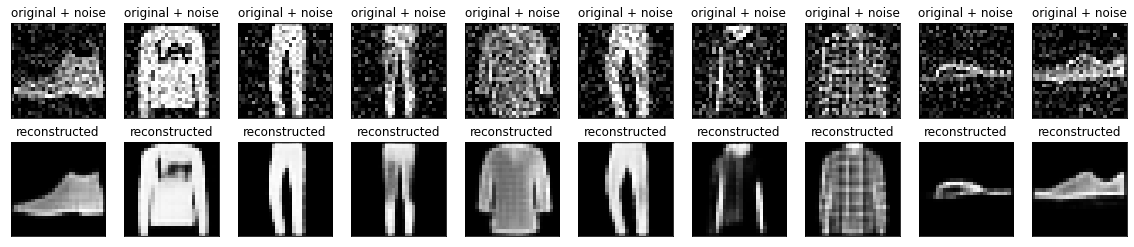

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

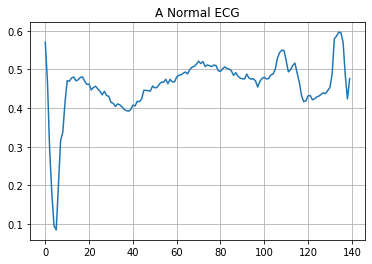

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

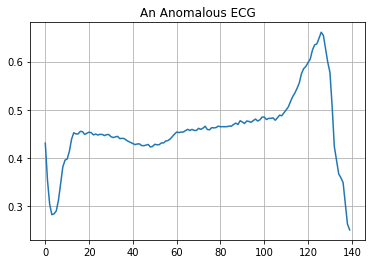

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


1/5 [=====>........................] - ETA: 1s - loss: 0.0588

5/5 [==============================] - 0s 31ms/step - loss: 0.0583 - val_loss: 0.0536


Epoch 2/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0572

5/5 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.0525


Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0556

5/5 [==============================] - 0s 8ms/step - loss: 0.0550 - val_loss: 0.0510


Epoch 4/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0531

5/5 [==============================] - 0s 8ms/step - loss: 0.0525 - val_loss: 0.0498


Epoch 5/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0499

5/5 [==============================] - 0s 8ms/step - loss: 0.0492 - val_loss: 0.0482


Epoch 6/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0463

5/5 [==============================] - 0s 8ms/step - loss: 0.0455 - val_loss: 0.0461


Epoch 7/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0421

5/5 [==============================] - 0s 8ms/step - loss: 0.0417 - val_loss: 0.0439


Epoch 8/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0385

5/5 [==============================] - 0s 8ms/step - loss: 0.0383 - val_loss: 0.0424


Epoch 9/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0362

5/5 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0408


Epoch 10/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0339

5/5 [==============================] - 0s 8ms/step - loss: 0.0331 - val_loss: 0.0395


Epoch 11/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0313

5/5 [==============================] - 0s 8ms/step - loss: 0.0308 - val_loss: 0.0385


Epoch 12/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0294

5/5 [==============================] - 0s 40ms/step - loss: 0.0291 - val_loss: 0.0377


Epoch 13/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0269

5/5 [==============================] - 0s 9ms/step - loss: 0.0275 - val_loss: 0.0372


Epoch 14/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0264

5/5 [==============================] - 0s 8ms/step - loss: 0.0263 - val_loss: 0.0366


Epoch 15/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0249

5/5 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.0359


Epoch 16/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0249

5/5 [==============================] - 0s 8ms/step - loss: 0.0247 - val_loss: 0.0352


Epoch 17/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0247

5/5 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.0347


Epoch 18/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0234

5/5 [==============================] - 0s 8ms/step - loss: 0.0233 - val_loss: 0.0341


Epoch 19/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0230

5/5 [==============================] - 0s 8ms/step - loss: 0.0226 - val_loss: 0.0337


Epoch 20/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0218

5/5 [==============================] - 0s 8ms/step - loss: 0.0220 - val_loss: 0.0331


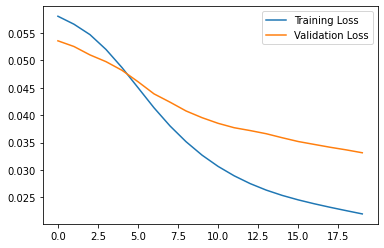

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

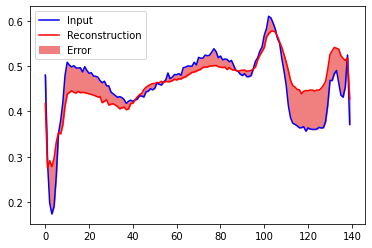

In [30]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

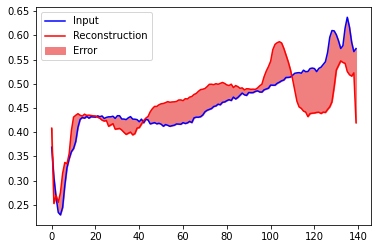

In [31]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

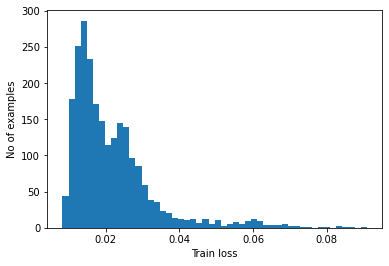

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03297184


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

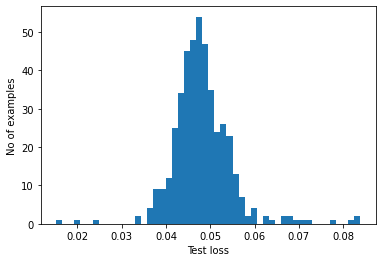

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.942
Precision = 0.9940944881889764
Recall = 0.9017857142857143


## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
